In [1]:
# Import relevant items
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import datetime as dt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [60]:
# Let's first load the data and take a look at what we have.
df = pd.read_csv('/content/drive/My Drive/AQ_Code/Test.csv')

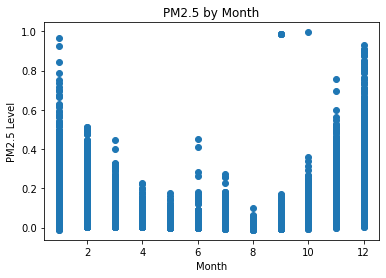

In [62]:
x = df['Month']
y = df['Value']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

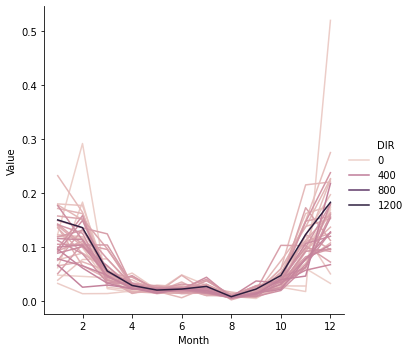

In [77]:
sb.relplot(x="Month", y="Value", hue="DIR", kind="line", ci=None, data=df);

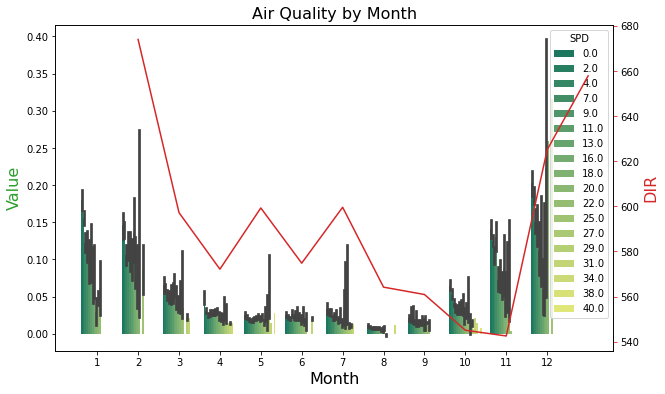

In [85]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Air Quality by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('PM2.5 Value', fontsize=16, color=color)
ax2 = sb.barplot(x='Month', y='Value', hue='SPD', data = df, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Wind Direction', fontsize=16, color=color)
ax2 = sb.lineplot(x='Month', y='DIR', ci= None, data = df, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()


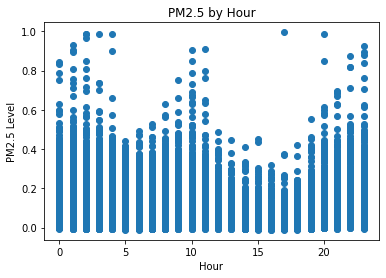

In [6]:
x = df['Hour']
y = df['Value']
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

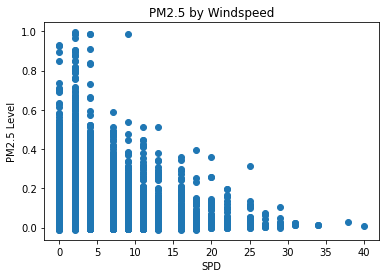

In [7]:
x = df['SPD']
y = df['Value']
plt.scatter(x,y)
plt.xlabel('SPD')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Windspeed')
plt.show()

In [8]:
df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df = df.dropna(axis=0,subset=['Value'])
df.shape

(18679, 8)

In [11]:
df = df.dropna(axis=0,subset=['HUM', 'TEMP'])
df.shape

(18558, 8)

In [12]:
df[df.DIR == 990]

,Date,Month,Hour,Value,DIR,SPD,TEMP,HUM
4,2015-10-01 04:00:00,1,4,0.056,990.0,11.0,52.0,30.0
7,2015-10-01 07:00:00,1,7,0.044,990.0,22.0,57.0,28.0
11,2015-10-01 11:00:00,1,11,0.071,990.0,4.0,52.0,34.0
13,2015-10-01 13:00:00,1,13,0.058,990.0,16.0,48.0,34.0
17,2015-10-01 17:00:00,1,17,0.044,990.0,2.0,34.0,30.0
...,...,...,...,...,...,...,...,...
19595,2018-01-31 04:00:00,1,4,0.153,990.0,2.0,-9.0,-15.0
19601,2018-01-31 10:00:00,1,10,0.415,990.0,4.0,-2.0,-9.0
19610,2018-01-31 19:00:00,1,19,0.010,990.0,2.0,-17.0,-22.0
19611,2018-01-31 20:00:00,1,20,0.011,990.0,2.0,-22.0,-29.0


In [13]:
df.describe()

,Month,Hour,Value,DIR,SPD,TEMP,HUM
count,18558.000000,18558.000000,18558.000000,14580.000000,16886.000000,18558.000000,18558.000000
mean,6.695172,11.566440,0.073359,593.681070,5.544830,27.080612,12.826813
std,3.643476,6.889819,0.105494,390.724451,5.215121,30.635907,24.495726
min,1.000000,0.000000,-0.012000,10.000000,0.000000,-42.000000,-49.000000
25%,3.000000,6.000000,0.013000,220.000000,2.000000,0.000000,-8.000000
50%,7.000000,12.000000,0.028000,350.000000,4.000000,28.000000,14.000000
75%,10.000000,18.000000,0.085000,990.000000,9.000000,54.000000,32.000000
max,12.000000,23.000000,0.995000,990.000000,40.000000,99.000000,64.000000


In [14]:
df = df.dropna(axis=0)

In [16]:
df = df.reset_index(drop=True)

In [17]:
df.dtypes

Date     datetime64[ns]
Month             int64
Hour              int64
Value           float64
DIR             float64
SPD             float64
TEMP            float64
HUM             float64
dtype: object

In [18]:
df[df.DIR == 990]

,Date,Month,Hour,Value,DIR,SPD,TEMP,HUM
1,2015-10-01 04:00:00,1,4,0.056,990.0,11.0,52.0,30.0
4,2015-10-01 07:00:00,1,7,0.044,990.0,22.0,57.0,28.0
8,2015-10-01 11:00:00,1,11,0.071,990.0,4.0,52.0,34.0
9,2015-10-01 13:00:00,1,13,0.058,990.0,16.0,48.0,34.0
12,2015-10-01 17:00:00,1,17,0.044,990.0,2.0,34.0,30.0
...,...,...,...,...,...,...,...,...
14564,2018-01-31 04:00:00,1,4,0.153,990.0,2.0,-9.0,-15.0
14567,2018-01-31 10:00:00,1,10,0.415,990.0,4.0,-2.0,-9.0
14575,2018-01-31 19:00:00,1,19,0.010,990.0,2.0,-17.0,-22.0
14576,2018-01-31 20:00:00,1,20,0.011,990.0,2.0,-22.0,-29.0


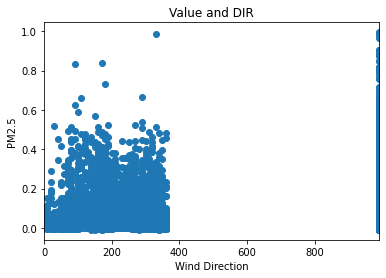

In [19]:
x = df.DIR
y = df.Value
plt.scatter(x,y)
plt.xlabel('Wind Direction')
plt.ylabel('PM2.5')
plt.title('Value and DIR')
plt.xlim(0, 990)
plt.show()

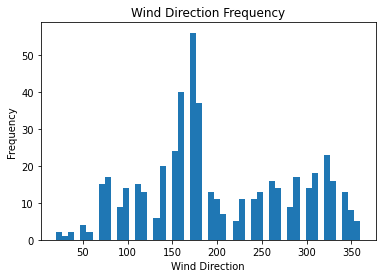

In [20]:
plt.hist(df.DIR[(df.DIR < 990) & (df.Value > .2)], 50)
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Wind Direction Frequency')
plt.show()

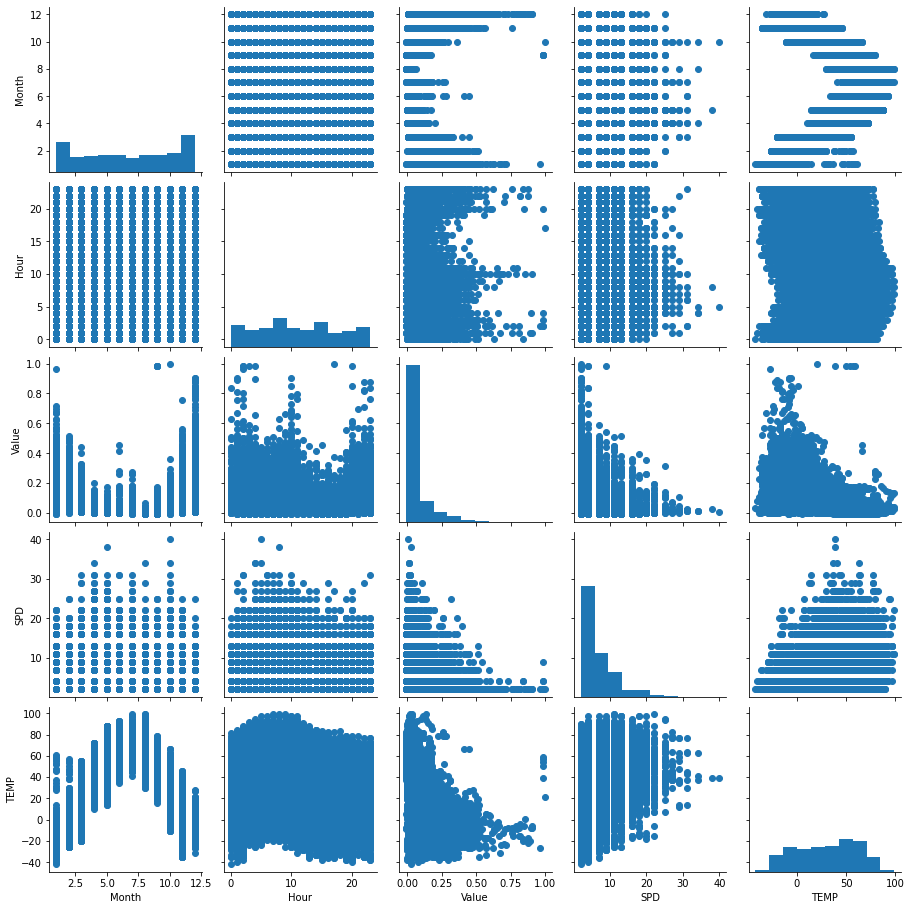

In [21]:

g = sb.PairGrid(df, vars=["Month", "Hour", "Value", "SPD", "TEMP"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

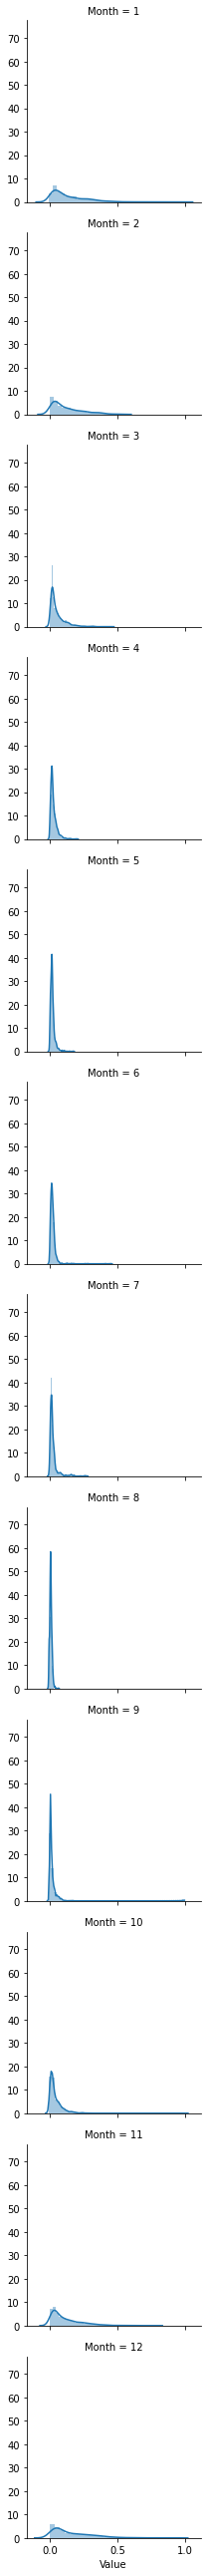

In [22]:
g = sb.FacetGrid(df, row='Month')
g.map(sb.distplot, "Value")
plt.show()

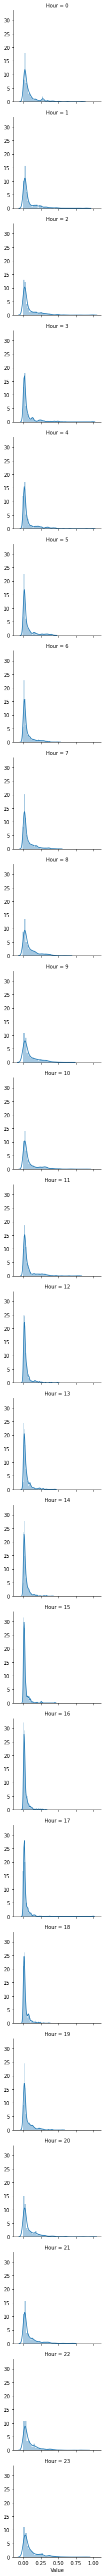

In [23]:
g = sb.FacetGrid(df, row='Hour')
g.map(sb.distplot, "Value")
plt.show()

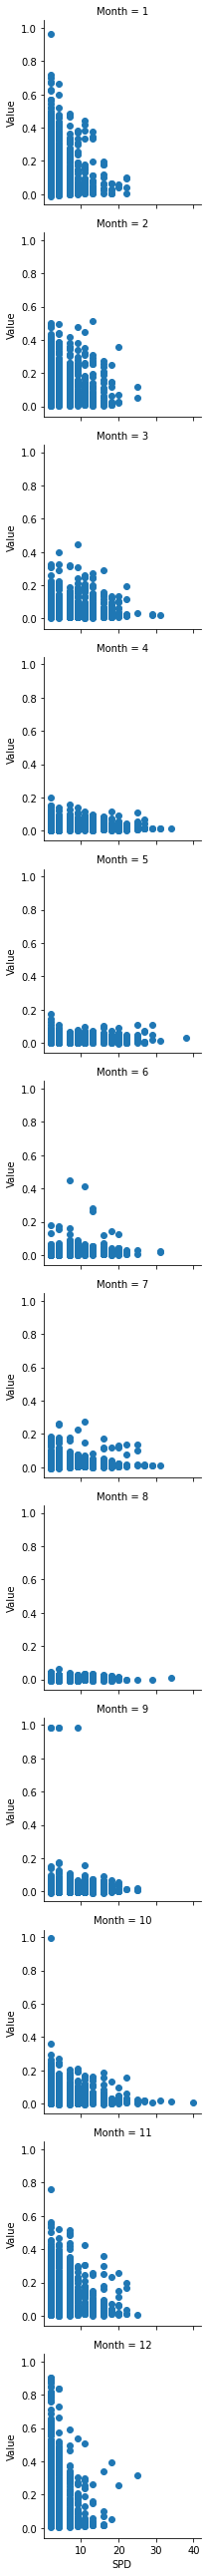

In [24]:
g = sb.FacetGrid(df, row='Month')
g.map(plt.scatter, "SPD","Value")
plt.show()


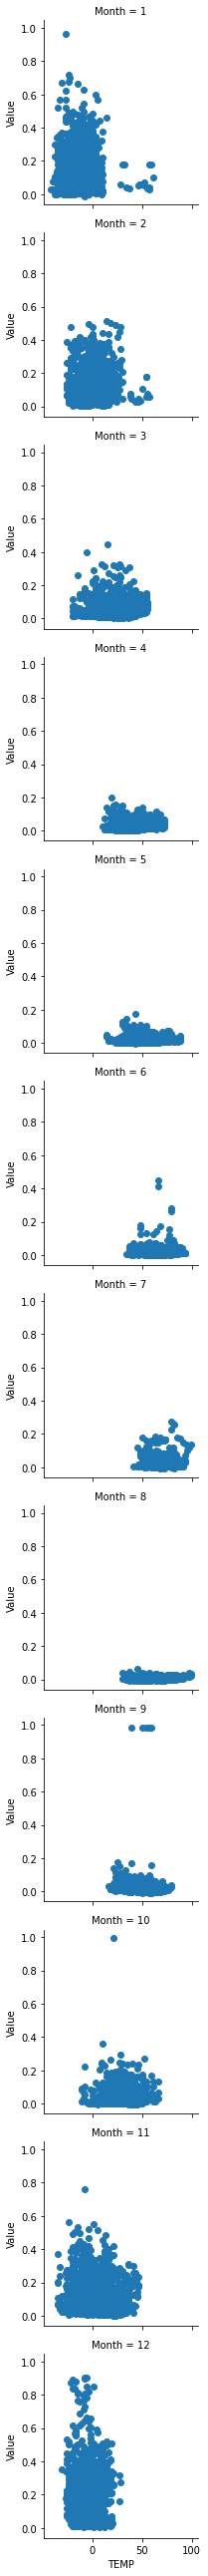

In [25]:
g = sb.FacetGrid(df, row='Month')
g.map(plt.scatter, "TEMP","Value")
plt.show()

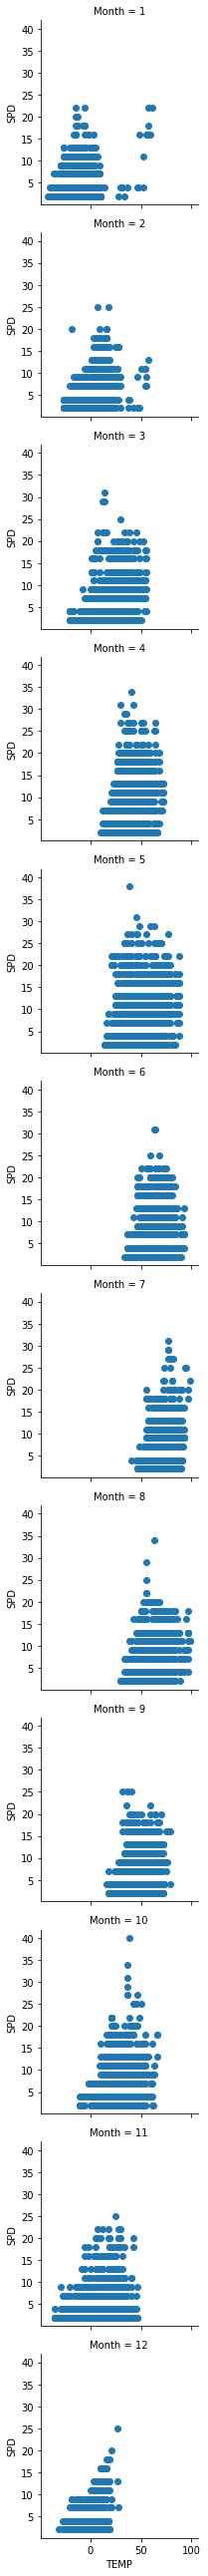

In [26]:
g = sb.FacetGrid(df, row='Month')
g.map(plt.scatter, "TEMP","SPD")
plt.show()

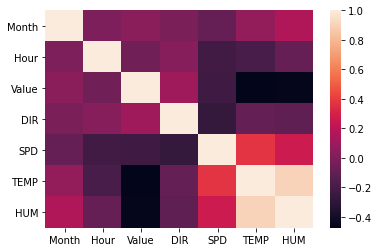

In [27]:
corr = df.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [28]:
# 1 mg = 1,000 µg
df['Value'] = df.Value * 1000


In [29]:
df.head(10)

,Date,Month,Hour,Value,DIR,SPD,TEMP,HUM
0,2015-10-01 03:00:00,1,3,58.0,210.0,4.0,47.0,29.0
1,2015-10-01 04:00:00,1,4,56.0,990.0,11.0,52.0,30.0
2,2015-10-01 05:00:00,1,5,36.0,270.0,16.0,55.0,30.0
3,2015-10-01 06:00:00,1,6,30.0,250.0,18.0,57.0,30.0
4,2015-10-01 07:00:00,1,7,44.0,990.0,22.0,57.0,28.0
5,2015-10-01 08:00:00,1,8,103.0,300.0,22.0,61.0,30.0
6,2015-10-01 09:00:00,1,9,176.0,270.0,16.0,59.0,28.0
7,2015-10-01 10:00:00,1,10,176.0,290.0,16.0,57.0,32.0
8,2015-10-01 11:00:00,1,11,71.0,990.0,4.0,52.0,34.0
9,2015-10-01 13:00:00,1,13,58.0,990.0,16.0,48.0,34.0


In [30]:
# For our purposes hazardous is hazardous, no need to apply a different category.
df['Value_cat'] = pd.cut(df['Value'],[-50,12,35.4,55.4,150.4,250.4,1000],labels=[1,2,3,4,5,6])

In [31]:
df.head(10)

,Date,Month,Hour,Value,DIR,SPD,TEMP,HUM,Value_cat
0,2015-10-01 03:00:00,1,3,58.0,210.0,4.0,47.0,29.0,4
1,2015-10-01 04:00:00,1,4,56.0,990.0,11.0,52.0,30.0,4
2,2015-10-01 05:00:00,1,5,36.0,270.0,16.0,55.0,30.0,3
3,2015-10-01 06:00:00,1,6,30.0,250.0,18.0,57.0,30.0,2
4,2015-10-01 07:00:00,1,7,44.0,990.0,22.0,57.0,28.0,3
5,2015-10-01 08:00:00,1,8,103.0,300.0,22.0,61.0,30.0,4
6,2015-10-01 09:00:00,1,9,176.0,270.0,16.0,59.0,28.0,5
7,2015-10-01 10:00:00,1,10,176.0,290.0,16.0,57.0,32.0,5
8,2015-10-01 11:00:00,1,11,71.0,990.0,4.0,52.0,34.0,4
9,2015-10-01 13:00:00,1,13,58.0,990.0,16.0,48.0,34.0,4


In [32]:
pd.unique(df.DIR)

array([210., 990., 270., 250., 300., 290., 350., 280., 310., 160.,  80.,
       190., 240., 220., 170., 330., 340., 320., 180., 130., 140.,  70.,
        30.,  40., 150., 200., 360.,  50., 120., 260.,  90.,  60., 100.,
        10., 230., 110.,  20.])

In [33]:
# Formula to convert F to C is: [°C] = ([°F] - 32) × 5/9
df['TEMP'] = (df.TEMP - 32) * 5.0/9.0


In [34]:
# Formula to convert F to C is: [°C] = ([°F] - 32) × 5/9
df['HUM'] = (df.HUM - 32) * 5.0/9.0


In [35]:
df.head(5)

,Date,Month,Hour,Value,DIR,SPD,TEMP,HUM,Value_cat
0,2015-10-01 03:00:00,1,3,58.0,210.0,4.0,8.333333,-1.666667,4
1,2015-10-01 04:00:00,1,4,56.0,990.0,11.0,11.111111,-1.111111,4
2,2015-10-01 05:00:00,1,5,36.0,270.0,16.0,12.777778,-1.111111,3
3,2015-10-01 06:00:00,1,6,30.0,250.0,18.0,13.888889,-1.111111,2
4,2015-10-01 07:00:00,1,7,44.0,990.0,22.0,13.888889,-2.222222,3


In [36]:
# 1 mph = 1.60934 kph
df['SPD'] = df.SPD * 1.60934


In [37]:
df.head(5)

,Date,Month,Hour,Value,DIR,SPD,TEMP,HUM,Value_cat
0,2015-10-01 03:00:00,1,3,58.0,210.0,6.43736,8.333333,-1.666667,4
1,2015-10-01 04:00:00,1,4,56.0,990.0,17.70274,11.111111,-1.111111,4
2,2015-10-01 05:00:00,1,5,36.0,270.0,25.74944,12.777778,-1.111111,3
3,2015-10-01 06:00:00,1,6,30.0,250.0,28.96812,13.888889,-1.111111,2
4,2015-10-01 07:00:00,1,7,44.0,990.0,35.40548,13.888889,-2.222222,3


In [38]:
df['day_week'] = df['Date'].dt.day_name()

In [39]:
df.head()

,Date,Month,Hour,Value,DIR,SPD,TEMP,HUM,Value_cat,day_week
0,2015-10-01 03:00:00,1,3,58.0,210.0,6.43736,8.333333,-1.666667,4,Thursday
1,2015-10-01 04:00:00,1,4,56.0,990.0,17.70274,11.111111,-1.111111,4,Thursday
2,2015-10-01 05:00:00,1,5,36.0,270.0,25.74944,12.777778,-1.111111,3,Thursday
3,2015-10-01 06:00:00,1,6,30.0,250.0,28.96812,13.888889,-1.111111,2,Thursday
4,2015-10-01 07:00:00,1,7,44.0,990.0,35.40548,13.888889,-2.222222,3,Thursday


In [40]:
df['day_week_cat'] = df.day_week.astype("category").cat.codes
df.head()

,Date,Month,Hour,Value,DIR,SPD,TEMP,HUM,Value_cat,day_week,day_week_cat
0,2015-10-01 03:00:00,1,3,58.0,210.0,6.43736,8.333333,-1.666667,4,Thursday,4
1,2015-10-01 04:00:00,1,4,56.0,990.0,17.70274,11.111111,-1.111111,4,Thursday,4
2,2015-10-01 05:00:00,1,5,36.0,270.0,25.74944,12.777778,-1.111111,3,Thursday,4
3,2015-10-01 06:00:00,1,6,30.0,250.0,28.96812,13.888889,-1.111111,2,Thursday,4
4,2015-10-01 07:00:00,1,7,44.0,990.0,35.40548,13.888889,-2.222222,3,Thursday,4


In [41]:
df.dtypes

Date            datetime64[ns]
Month                    int64
Hour                     int64
Value                  float64
DIR                    float64
SPD                    float64
TEMP                   float64
HUM                    float64
Value_cat             category
day_week                object
day_week_cat              int8
dtype: object

In [42]:
load = df[['Value', 'Month']].groupby(['Month']).mean()

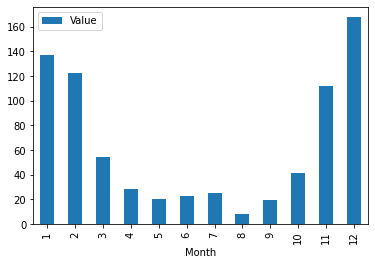

In [43]:
load.plot(kind='bar')

In [44]:
df = df.drop(labels='day_week', axis=1)

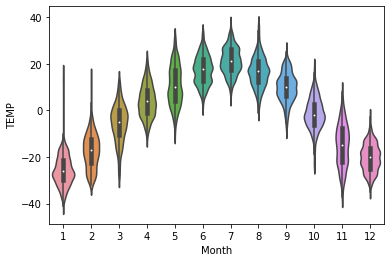

In [45]:
ax = sb.violinplot(x="Month", y="TEMP", data=df)

In [46]:
df = df.drop(['Date', 'Value'], axis=1)
df.columns

Index(['Month', 'Hour', 'DIR', 'SPD', 'TEMP', 'HUM', 'Value_cat',
       'day_week_cat'],
      dtype='object')

In [47]:
#y = df['Value_cat']
y = df['Month']

In [48]:
#X = df.drop(['Value_cat'], axis=1)
X = df.drop(['Month'], axis=1)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [50]:
X_train.shape, y_train.shape

((10206, 7), (10206,))

In [51]:
X_test.shape, y_test.shape

((4374, 7), (4374,))

In [52]:
#Random Forest
# Create Random Forest Regressor object
rf = RandomForestClassifier()

In [53]:
# Train the model using the training sets
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
# Score the model
rf_score = rf.score(X_test, y_test)
rf_score

0.5829903978052127

In [55]:
# Make predictions using the testing set
rf_pred = rf.predict(X_test)

In [56]:
# Calculate confusion matrix
confusion_rf = confusion_matrix(y_test, rf_pred)

In [57]:
confusion_rf

array([[251,  28,   4,   0,   4,   0,   0,   0,   3,   0,  34,  84],
       [ 31,  80,  10,   1,   3,   0,   0,   0,   1,   5,  66,  80],
       [  5,  19, 154,  32,   5,   0,   0,   0,   3,  63,  38,  17],
       [  0,   1,  13, 237,  51,   0,   0,   0,   6,  36,   2,   0],
       [  0,   0,  10,  43, 244,  26,   1,   3,  19,  18,   0,   0],
       [  0,   0,   0,   0,  40, 240,  49,  31,  12,   0,   0,   0],
       [  0,   0,   0,   0,   2,  37, 212,  51,   9,   0,   0,   0],
       [  0,   0,   0,   0,   3,  37,  43, 219,  54,   3,   0,   0],
       [  0,   0,   1,   8,  34,  31,   5,  32, 239,  26,   1,   0],
       [  0,   3,  30,  30,  25,   1,   0,   0,  10, 276,  17,   2],
       [ 56,  29,  28,   7,   0,   0,   0,   0,   0,  24, 164,  98],
       [ 62,  51,  10,   0,   0,   0,   0,   0,   0,   3,  64, 234]])

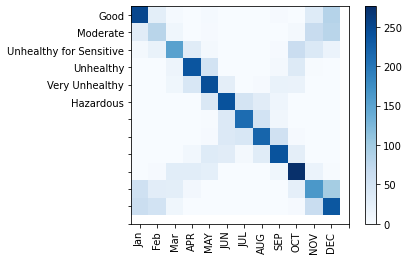

In [58]:
#columns1 = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']
columns = ['Jan','Feb','Mar','APR','MAY', 'JUN','JUL','AUG','SEP','OCT','NOV','DEC']
plt.imshow(confusion_rf, cmap=plt.cm.Blues, interpolation='nearest')
#plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
#plt.yticks([0,1,2,3,4,5], columns)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12], columns)
plt.colorbar()

plt.show()